![imagen.png](https://i.imgur.com/d17FLgS.png)


*Nuestro trabajo está basado en Prédictions d’activité dans les réseaux sociaux en ligne (F. Kawala, A. Douzal-Chouakria, E. Gaussier, E. Dimert), In Actes de la Conférence sur les Modèles et l′Analyse des Réseaux : Approches Mathématiques et Informatique (MARAMI), pp. 16, 2013.*   
>https://archive.ics.uci.edu/ml/datasets/Buzz+in+social+media+   
 https://hal.archives-ouvertes.fr/hal-00881395/document



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

**Histogramas:**

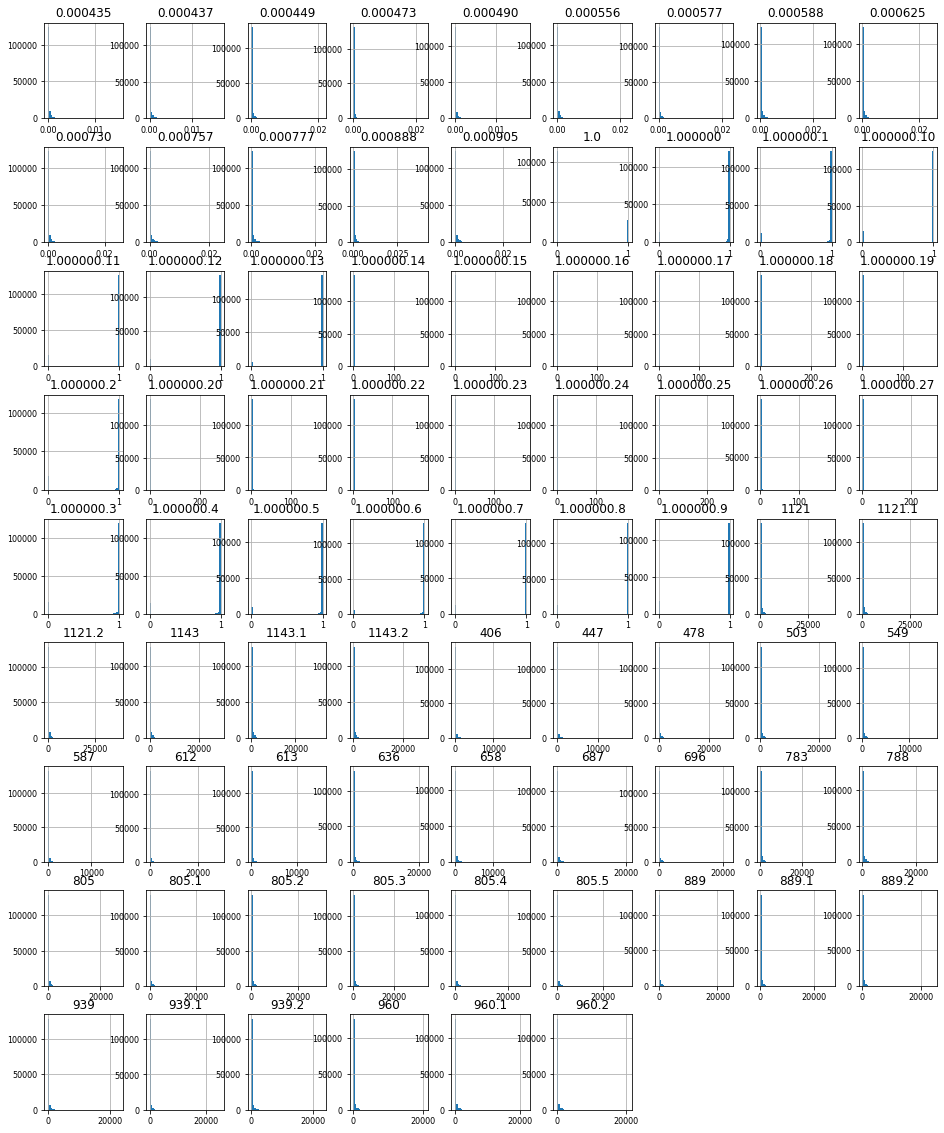

In [2]:
import zipfile
try:
  with zipfile.ZipFile("twitter.zip","r") as zip_ref:
    zip_ref.extractall(".")
except IOError:
  from google.colab import drive
  drive.mount('/content/drive')
  path = "/content/drive/My Drive/data/proyectoFinal/twitter.zip"
  with zipfile.ZipFile(path ,"r") as zip_ref:
    zip_ref.extractall(".")

Twitter_Absolute_Sigma = pd.read_table('Twitter-Absolute-Sigma-500.csv',sep=",")
Twitter_Absolute_Sigma.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

display(Markdown("**Histogramas:**"))

La descripcion y detalles de las variable puede ser encontrada en:   
http://ama.liglab.fr/data/buzz/classification/Twitter/Absolute_labeling/Twitter-Absolute-Sigma-500.names

In [3]:
Twitter_Absolute_Sigma.columns= ["NCD_0", "NCD_1", "NCD_2", "NCD_3", "NCD_4", "NCD_5", "NCD_6", "AI_0", "AI_1", "AI_2", "AI_3", "AI_4", "AI_5", "AI_6", "AS_NA_0", "AS_NA_1", "AS_NA_2", "AS_NA_3", "AS_NA_4", "AS_NA_5", "AS_NA_6", "BL_0", "BL_1", "BL_2", "BL_3", "BL_4", "BL_5", "BL_6", "NAC_0", "NAC_1", "NAC_2", "NAC_3", "NAC_4", "NAC_5", "NAC_6", "AS_NAC_0", "AS_NAC_1", "AS_NAC_2", "AS_NAC_3", "AS_NAC_4", "AS_NAC_5", "AS_NAC_6", "CS_0", "CS_1", "CS_2", "CS_3", "CS_4", "CS_5", "CS_6", "AT_0", "AT_1", "AT_2", "AT_3", "AT_4", "AT_5", "AT_6", "NA_0", "NA_1", "NA_2", "NA_3", "NA_4", "NA_5", "NA_6", "ADL_0", "ADL_1", "ADL_2", "ADL_3", "ADL_4", "ADL_5", "ADL_6", "NAD_0", "NAD_1", "NAD_2", "NAD_3", "NAD_4", "NAD_5", "NAD_6", "buzz"]

In [4]:
Twitter_Absolute_Sigma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140706 entries, 0 to 140705
Data columns (total 78 columns):
NCD_0       140706 non-null int64
NCD_1       140706 non-null int64
NCD_2       140706 non-null int64
NCD_3       140706 non-null int64
NCD_4       140706 non-null int64
NCD_5       140706 non-null int64
NCD_6       140706 non-null int64
AI_0        140706 non-null int64
AI_1        140706 non-null int64
AI_2        140706 non-null int64
AI_3        140706 non-null int64
AI_4        140706 non-null int64
AI_5        140706 non-null int64
AI_6        140706 non-null int64
AS_NA_0     140706 non-null float64
AS_NA_1     140706 non-null float64
AS_NA_2     140706 non-null float64
AS_NA_3     140706 non-null float64
AS_NA_4     140706 non-null float64
AS_NA_5     140706 non-null float64
AS_NA_6     140706 non-null float64
BL_0        140706 non-null float64
BL_1        140706 non-null float64
BL_2        140706 non-null float64
BL_3        140706 non-null float64
BL_4        14070

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

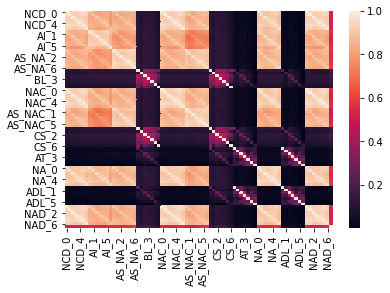

In [5]:
matriz_corr = Twitter_Absolute_Sigma.corr().abs()
print(type(matriz_corr))
sb.heatmap(matriz_corr)


Podemos eliminar **46** que estan altamente relacionadas entre si.

Dimenciones previas: (140706, 78)
Dimenciones nuevas:  (140706, 32)


**Nueva matriz de correlación:**

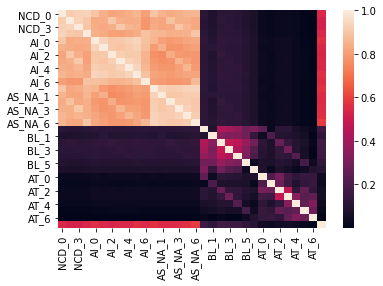

In [6]:
# Método de curado para columnas correlacionadas obtenido de:
# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# pero adaptado para nuestro poryecto

upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
la_borracion = [column for column in upper.columns if any(upper[column] > 0.95)]

display(Markdown("Podemos eliminar **{0}** que estan altamente relacionadas entre si.".format(len(la_borracion))))
twitter_nuevo = Twitter_Absolute_Sigma.drop(Twitter_Absolute_Sigma[la_borracion], axis = 1)

print("Dimenciones previas: {}".format(Twitter_Absolute_Sigma.shape))
print("Dimenciones nuevas:  {}".format(twitter_nuevo.shape))

# matriz_corr2 = twitter_nuevo.corr().abs()
# print(type(matriz_corr2))
# sb.heatmap(matriz_corr2)

matriz_corr2 = twitter_nuevo.corr().abs()
sb.heatmap(matriz_corr2)
display(Markdown("**Nueva matriz de correlación:**"))

In [7]:

correlacion = twitter_nuevo.corr()['buzz'][:-1]
#print(correlacion)
print("El tipo del objecto correlacion es: **{0}**".format(type(correlacion)))
golden_features_list = correlacion[abs(correlacion) > 0.5].sort_values(ascending=False)
display(Markdown("Existe una alta correlación entre buzz y la(s) **{0}** variable(s) que imprimimos a continuación:"
                 .format(len(golden_features_list))))
print(golden_features_list)

El tipo del objecto correlacion es: **<class 'pandas.core.series.Series'>**


Existe una alta correlación entre buzz y la(s) **17** variable(s) que imprimimos a continuación:

AS_NA_6    0.590685
AS_NA_0    0.569936
AI_0       0.563503
AI_5       0.563072
AS_NA_4    0.562929
AS_NA_3    0.557119
AI_6       0.552311
AS_NA_1    0.551447
AS_NA_2    0.547838
AI_4       0.546427
AI_1       0.545227
NCD_0      0.540727
NCD_6      0.540694
AI_3       0.540559
AI_2       0.537591
NCD_3      0.526567
NCD_2      0.525923
Name: buzz, dtype: float64


In [8]:
#Transformando la columna buzz a int
twitter_nuevo['buzz'] = twitter_nuevo['buzz'].map( {1.0: 1, 0.0: 0} ).astype(int)

In [9]:
twitter_2 = twitter_nuevo[["AS_NA_6", "AS_NA_0", "AI_0", "AI_5", "AS_NA_4", "AS_NA_3", "AI_6", "AS_NA_1", "AS_NA_2",
              "AI_4", "AI_1", "NCD_0", "NCD_6", "AI_3", "AI_2", "NCD_3", "NCD_2", "buzz"]]
X = twitter_2
X.drop(["buzz"], axis = 1)
X

,AS_NA_6,AS_NA_0,AI_0,AI_5,AS_NA_4,AS_NA_3,AI_6,AS_NA_1,AS_NA_2,AI_4,AI_1,NCD_0,NCD_6,AI_3,AI_2,NCD_3,NCD_2,buzz
0,0.000729,0.000517,366,519,0.000647,0.000614,545,0.000460,0.000474,463,288,542,832,445,318,626,504,1
1,0.000496,0.000234,66,65,0.000618,0.000264,113,0.000249,0.000490,131,59,92,162,58,118,100,196,0
2,0.000548,0.000339,83,696,0.000538,0.001074,159,0.000294,0.000320,155,78,90,184,288,76,344,92,1
3,0.000582,0.000498,141,82,0.000289,0.000295,160,0.000286,0.000304,79,68,169,185,73,85,90,101,1
4,0.001120,0.000803,614,776,0.000863,0.000800,828,0.000777,0.000929,697,588,775,1198,643,751,806,935,1
5,0.001140,0.000547,348,503,0.000363,0.000435,816,0.001139,0.000389,240,909,469,1189,258,261,354,332,1
6,0.001412,0.000799,578,632,0.000845,0.000979,1198,0.000747,0.000786,628,516,818,1409,726,546,1099,756,1
7,0.001010,0.000846,543,742,0.000982,0.000964,727,0.000679,0.000997,740,432,832,1037,673,627,944,898,1
8,0.001021,0.000833,659,811,0.000799,0.000646,748,0.000977,0.000778,566,790,920,1067,460,601,662,833,1
9,0.001030,0.000842,564,750,0.000981,0.001030,722,0.000764,0.000818,770,573,849,1037,788,641,1150,863,1


In [10]:
X= X.drop(['buzz'], axis = 1)
y = twitter_2['buzz']
X

,AS_NA_6,AS_NA_0,AI_0,AI_5,AS_NA_4,AS_NA_3,AI_6,AS_NA_1,AS_NA_2,AI_4,AI_1,NCD_0,NCD_6,AI_3,AI_2,NCD_3,NCD_2
0,0.000729,0.000517,366,519,0.000647,0.000614,545,0.000460,0.000474,463,288,542,832,445,318,626,504
1,0.000496,0.000234,66,65,0.000618,0.000264,113,0.000249,0.000490,131,59,92,162,58,118,100,196
2,0.000548,0.000339,83,696,0.000538,0.001074,159,0.000294,0.000320,155,78,90,184,288,76,344,92
3,0.000582,0.000498,141,82,0.000289,0.000295,160,0.000286,0.000304,79,68,169,185,73,85,90,101
4,0.001120,0.000803,614,776,0.000863,0.000800,828,0.000777,0.000929,697,588,775,1198,643,751,806,935
5,0.001140,0.000547,348,503,0.000363,0.000435,816,0.001139,0.000389,240,909,469,1189,258,261,354,332
6,0.001412,0.000799,578,632,0.000845,0.000979,1198,0.000747,0.000786,628,516,818,1409,726,546,1099,756
7,0.001010,0.000846,543,742,0.000982,0.000964,727,0.000679,0.000997,740,432,832,1037,673,627,944,898
8,0.001021,0.000833,659,811,0.000799,0.000646,748,0.000977,0.000778,566,790,920,1067,460,601,662,833
9,0.001030,0.000842,564,750,0.000981,0.001030,722,0.000764,0.000818,770,573,849,1037,788,641,1150,863


In [11]:
#!pip3 install imblearn

#!{sys.executable} -m pip install imblearn
#!{sys.executable} -m pip install Counter

from imblearn.under_sampling import RandomUnderSampler
#import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', len(y))
print('Resample dataset shape', len(y_rus))

original dataset shape: 140706
Resample dataset shape 55548


**Variables independientes vs buzz (dependiente):**

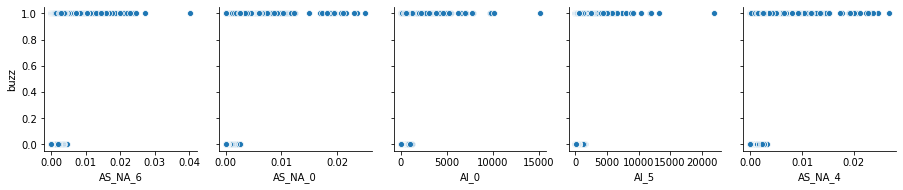

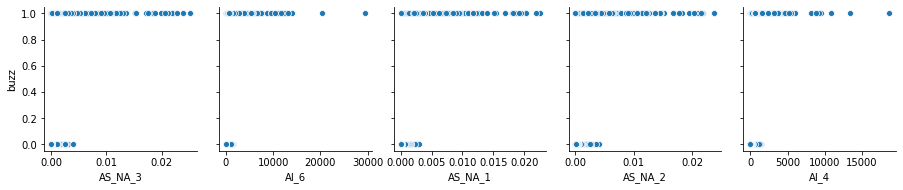

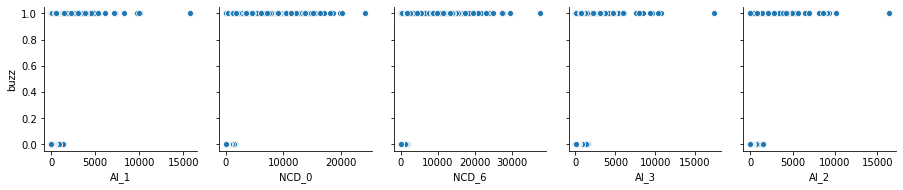

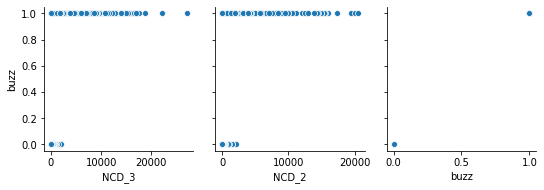

In [12]:
# Analisis de las variables independientes vs buzz (dependiente)
# https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
display(Markdown("**Variables independientes vs buzz (dependiente):**"))
for i in range(0, len(twitter_2.columns), 5):
    sb.pairplot(data=twitter_2,
                x_vars=twitter_2.columns[i:i+5],
                y_vars=['buzz'])

In [13]:
# 0.1974 sin aplicar técnica SMOTE para los conjuntos altamente imbalanceados.
display(Markdown("**Podemos observar que es un conjunto altamente desbalanceado:**"))
print("y.sum() / y.count():                 ",round(y.sum()/y.count(),4))
print("y_rus.sum() / y_rus.count():         ",round(y_rus.sum()/y_rus.count(),4))

# 0.82 sin balancear
print("max(y.mean(), 1 - y.mean():          ",round(max(y.mean(), 1 - y.mean()),4))
print("max(y_rus.mean(), 1 - y_rus.mean()): ",round(max(y_rus.mean(), 1 - y_rus.mean()),4))

**Podemos observar que es un conjunto altamente desbalanceado:**

y.sum() / y.count():                  0.1974
y_rus.sum() / y_rus.count():          0.5
max(y.mean(), 1 - y.mean():           0.8026
max(y_rus.mean(), 1 - y_rus.mean()):  0.5


Con base en la nula precisión y **y.sum () / y.count()** vemos que el conjunto de datos no está equilibrado. Es preferible utilizar **AUC** al evaluar los modelos sobre datos desequilibrados. Por lo tanto, para este proyecto, consideramos **AUC** como una función *scoring*.

In [14]:
Dummytrain,sample_data,Dummytrain2,sample_target = train_test_split(x_rus, y_rus, shuffle = True, test_size = 0.25)
X = sample_data
y = sample_target
X

,AS_NA_6,AS_NA_0,AI_0,AI_5,AS_NA_4,AS_NA_3,AI_6,AS_NA_1,AS_NA_2,AI_4,AI_1,NCD_0,NCD_6,AI_3,AI_2,NCD_3,NCD_2
41970,0.001005,0.001052,184,176,0.000550,0.000585,174,0.000971,0.000680,132,186,633,643,82,101,317,407
10692,0.000021,0.000018,13,13,0.000011,0.000027,19,0.000006,0.000013,6,4,18,21,21,9,25,12
46012,0.001547,0.000681,564,1040,0.001313,0.001343,1168,0.001117,0.001339,1032,940,820,1506,1103,1087,1417,1423
51832,0.000738,0.000634,192,230,0.000571,0.000514,236,0.000666,0.000590,164,174,364,489,149,189,248,333
18975,0.000000,0.000001,1,8,0.000000,0.000000,0,0.000002,0.000000,0,2,1,0,0,0,0,0
53491,0.004561,0.003966,808,1203,0.005893,0.006724,980,0.003673,0.005816,1081,785,2710,3148,1305,1086,4727,4058
27894,0.000419,0.000183,105,142,0.000262,0.000223,146,0.000147,0.000198,127,83,162,226,97,103,162,142
18158,0.000126,0.000103,14,27,0.000109,0.000127,22,0.000081,0.000130,18,11,53,104,37,16,67,80
50696,0.000494,0.000110,45,56,0.000081,0.000116,218,0.000158,0.000274,40,73,115,516,53,141,125,304
32889,0.001142,0.001121,442,536,0.001696,0.001193,497,0.001018,0.001277,687,467,1249,1369,478,538,1481,1478


In [15]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x_rus, y_rus, random_state=0)

In [16]:
# Elegimos el MinMaxScaler para escalar los datos

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [17]:
df_train = pd.DataFrame(data = X_train, columns = ["AS_NA_6", "AS_NA_0", "AI_0", "AI_5", "AS_NA_4", "AS_NA_3", "AI_6", "AS_NA_1", "AS_NA_2",
              "AI_4", "AI_1", "NCD_0", "NCD_6", "AI_3", "AI_2", "NCD_3", "NCD_2"])
df_train['ybuzz'] = y_train.values

In [18]:
# Nos basamos en 
# https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
# Para remover los outliers de nuestro conjunto de datos
from scipy.stats import zscore
z_scores = zscore(df_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = df_train[filtered_entries]
print(df_train.count(), new_df.count())

AS_NA_6    41661
AS_NA_0    41661
AI_0       41661
AI_5       41661
AS_NA_4    41661
AS_NA_3    41661
AI_6       41661
AS_NA_1    41661
AS_NA_2    41661
AI_4       41661
AI_1       41661
NCD_0      41661
NCD_6      41661
AI_3       41661
AI_2       41661
NCD_3      41661
NCD_2      41661
ybuzz      41661
dtype: int64 AS_NA_6    39851
AS_NA_0    39851
AI_0       39851
AI_5       39851
AS_NA_4    39851
AS_NA_3    39851
AI_6       39851
AS_NA_1    39851
AS_NA_2    39851
AI_4       39851
AI_1       39851
NCD_0      39851
NCD_6      39851
AI_3       39851
AI_2       39851
NCD_3      39851
NCD_2      39851
ybuzz      39851
dtype: int64


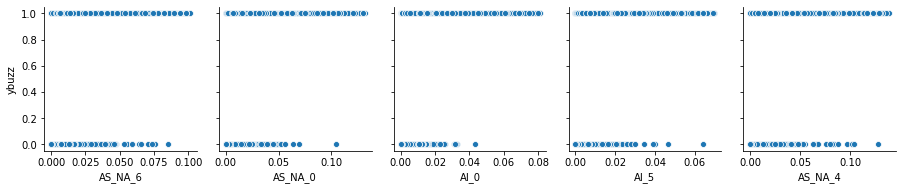

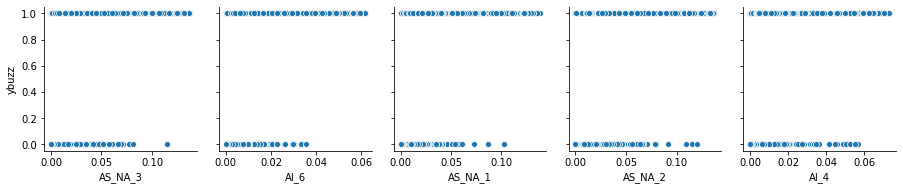

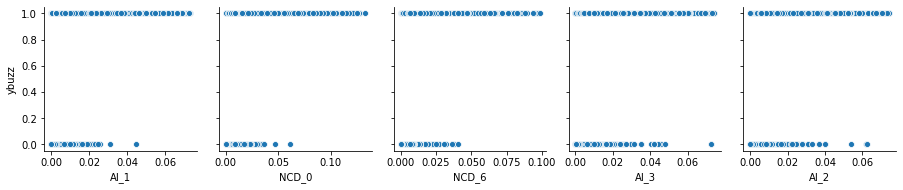

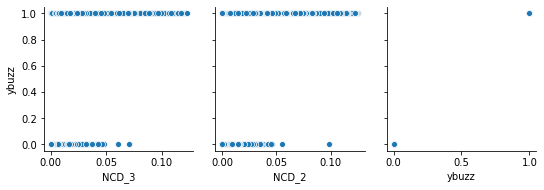

In [19]:
for i in range(0, len(new_df.columns), 5):
    sb.pairplot(data=new_df,
                x_vars=new_df.columns[i:i+5],
                y_vars=['ybuzz'])

In [20]:
print(new_df.ybuzz.shape)
np.sum(new_df.ybuzz[new_df.ybuzz == 1])

(39851,)


18991

In [21]:
new_df.ybuzz.count()

new_y_train = new_df.ybuzz
new_x_train = new_df.drop(["ybuzz"], axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import RandomizedSearchCV

In [22]:
from sklearn.linear_model import LogisticRegression as lr
classifier = lr()

C = [0, 3, 7, 13, 17, 21, 32 , 45, 56, 10]
penalty = ['l1', 'l2', 'None']
solver = ['saga', 'lbfgs']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)

clf1 = RandomizedSearchCV(classifier, hyperparameters, n_iter=30, cv=5, scoring='accuracy')

best_model1 = clf1.fit(new_x_train,np.array(new_y_train).reshape(new_y_train.shape[0],1))

In [23]:
pred1 = np.array(best_model1.predict(X_test))

recall_lr    = rs(y_test,pred1)
precision_lr = ps(y_test,pred1)
f1_lr        = fs(y_test,pred1)
ma_lr        = clf1.score(X_test,y_test)

a1 = pd.DataFrame(y_test)
a1['pred']= clf1.predict(X_test)

display(Markdown("**=== Evaluación de modelo: Logistic Regression ===**"))
display(Markdown("**Mejores hiperparametros:**"))
print('Best C:         ', best_model1.best_estimator_.get_params()['C'])
print('Best Penalty:   ', best_model1.best_estimator_.get_params()['penalty'])
print('Best Solver:    ', best_model1.best_estimator_.get_params()['solver'])

display(Markdown("**Metricas:**"))
print('Recall Score:   ',recall_lr)
print('Precision Score:',precision_lr)
print('F1 Score:       ',f1_lr)
print('Accuracy:       ',ma_lr)

display(Markdown("**Buzz or not buzz vs Pred:**"))
print(a1.head())

**=== Evaluación de modelo: Logistic Regression ===**

**Mejores hiperparametros:**

Best C:          10
Best Penalty:    l1
Best Solver:     saga


**Metricas:**

Recall Score:    0.942230504587156
Precision Score: 0.9556557138703111
F1 Score:        0.9488956258120399
Accuracy:        0.9490170663210197


**Buzz or not buzz vs Pred:**

       buzz  pred
10959     0     0
2158      0     0
27884     1     1
20794     0     0
20672     0     0


In [24]:
from sklearn import svm
classifier = svm.SVC()

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_svc_lin = GridSearchCV(classifier, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [25]:
best_model_svc = grid_svc_lin.fit(new_x_train, new_y_train)

In [26]:
pred2 = np.array(best_model_svc.predict(X_test))

recall_svm    = rs(y_test,pred2)
precision_svm = ps(y_test,pred2)
f1_svm        = fs(y_test,pred2)
ma_svm        = grid_svc_lin.score(X_test,y_test)

a2 = pd.DataFrame(y_test)
a2['pred'] = grid_svc_lin.predict(X_test)

display(Markdown("**=== Evaluación de modelo: SVM ===**"))
display(Markdown("**Mejores hiperparametros:**"))
print('Best kernel:     ', best_model_svc.best_estimator_.get_params()['kernel'])
print('Best degree:     ', best_model_svc.best_estimator_.get_params()['degree'])
print('Best gamma:      ', best_model_svc.best_estimator_.get_params()['gamma'])

display(Markdown("**Metricas:**"))
print('Recall Score:   ', recall_svm)
print('Precision Score:', precision_svm)
print('F1 Score:       ', f1_svm)
print('Accuracy:       ', ma_svm)

display(Markdown("**Buzz or not buzz vs Pred:**"))
print(a2.head())

**=== Evaluación de modelo: SVM ===**

**Mejores hiperparametros:**

Best kernel:      rbf
Best degree:      3
Best gamma:       scale


**Metricas:**

Recall Score:    0.9544151376146789
Precision Score: 0.9465453511515496
F1 Score:        0.9504639543183441
Accuracy:        0.9847895930102124


**Buzz or not buzz vs Pred:**

       buzz  pred
10959     0     0
2158      0     0
27884     1     1
20794     0     0
20672     0     0


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
modelo_mlp  = clf.fit(new_x_train, new_y_train)

In [28]:
pred3 = np.array(modelo_mlp.predict(X_test))

recall_mlp    = rs(y_test,pred3)
precision_mlp = ps(y_test,pred3)
f1_mlp        = fs(y_test,pred3)
ma_mlp        = grid_svc_lin.score(X_test,y_test)

a3 = pd.DataFrame(y_test)
a3['pred']= clf.predict(X_test)

display(Markdown("**=== Evaluación de modelo: MLP ===**"))
display(Markdown("**Mejores hiperparametros:**"))
print('Best hidden_layer_sizes:', modelo_mlp.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best alpha:             ', modelo_mlp.best_estimator_.get_params()['alpha'])
print('Best learning_rate:     ', modelo_mlp.best_estimator_.get_params()['learning_rate'])
print('Best activation:        ', modelo_mlp.best_estimator_.get_params()['activation'])
print('Best solver:            ', modelo_mlp.best_estimator_.get_params()['solver'])

display(Markdown("**Metricas:**"))
print('Recall Score:   ', recall_mlp)
print('Precision Score:', precision_mlp)
print('F1 Score:       ', f1_mlp)
print('Accuracy:       ', ma_mlp)

display(Markdown("**Buzz or not buzz vs Pred:**"))
print(a3.head())

**=== Evaluación de modelo: MLP ===**

**Mejores hiperparametros:**

Best hidden_layer_sizes: (100,)
Best alpha:              0.0001
Best learning_rate:      constant
Best activation:         relu
Best solver:             adam


**Metricas:**

Recall Score:    0.9501146788990825
Precision Score: 0.951478610393339
F1 Score:        0.9507961555013626
Accuracy:        0.9847895930102124


**Buzz or not buzz vs Pred:**

       buzz  pred
10959     0     0
2158      0     0
27884     1     1
20794     0     0
20672     0     0


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

bootstrap = [True]
criterion = ['gini','entropy']
oob_score = [True]

hyperparameters = dict(bootstrap=bootstrap, oob_score=oob_score, criterion=criterion)

clf4 = GridSearchCV(classifier, hyperparameters,  cv=5, scoring='accuracy')

modelo_random_f = clf4.fit(new_x_train,np.array(new_y_train.values.ravel()).reshape(new_y_train.values.ravel().shape[0],1))

In [31]:
pred4 = np.array(modelo_random_f.predict(X_test))

recall_rdf    = rs(y_test,pred4)
precision_rdf = ps(y_test,pred4)
f1_rdf        = fs(y_test,pred4)
ma_rdf        = clf4.score(X_test,y_test)

a4 = pd.DataFrame(y_test)
a4['pred']= clf4.predict(X_test)

display(Markdown("**=== Evaluación de modelo: Random Forest ===**"))
display(Markdown("**Mejores hiperparametros:**"))
print('Best ccp_alpha:        ', modelo_random_f.best_estimator_.get_params()['ccp_alpha'])
print('Best max_depth:        ', modelo_random_f.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', modelo_random_f.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf: ', modelo_random_f.best_estimator_.get_params()['min_samples_leaf'])
print('Best n_estimators:     ', modelo_random_f.best_estimator_.get_params()['n_estimators'])

display(Markdown("**Metricas:**"))
print('Recall Score:   ', recall_rdf)
print('Precision Score:', precision_rdf)
print('F1 Score:       ', f1_rdf)
print('Accuracy:       ', ma_rdf)

display(Markdown("**Buzz or not buzz vs Pred:**"))
print(a4.head())

**=== Evaluación de modelo: Random Forest ===**

**Mejores hiperparametros:**

Best ccp_alpha:         0.0
Best max_depth:         None
Best min_samples_split: 2
Best min_samples_leaf:  1
Best n_estimators:      100


**Metricas:**

Recall Score:    0.9536983944954128
Precision Score: 0.9565780014378146
F1 Score:        0.9551360275644246
Accuracy:        0.9549938791675668


**Buzz or not buzz vs Pred:**

       buzz  pred
10959     0     0
2158      0     0
27884     1     1
20794     0     0
20672     0     0


In [34]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc()

criterion = ['gini','entropy']

hyperparameters = dict(criterion=criterion)

clf5 = GridSearchCV(classifier, hyperparameters,  cv=5, scoring='accuracy')

modelo_dct= clf5.fit(new_x_train,np.array(new_y_train.values.ravel()).reshape(new_y_train.values.ravel().shape[0],1))

In [38]:
pred5 = np.array(modelo_dct.predict(X_test))

recall_dct    = rs(y_test,pred5)
precision_dct = ps(y_test,pred5)
f1_dct        = fs(y_test,pred5)
ma_dct        = clf5.score(X_test,y_test)

a5 = pd.DataFrame(y_test)
a5['pred']= clf5.predict(X_test)

display(Markdown("**=== Evaluación de modelo: Decision Tree ===**"))
display(Markdown("**Mejores hiperparametros:**"))
print('Best ccp_alpha:         ', modelo_dct.best_estimator_.get_params()['ccp_alpha'])
print('Best max_depth:         ', modelo_dct.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split: ', modelo_dct.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:  ', modelo_dct.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion:         ', modelo_dct.best_estimator_.get_params()['criterion'])

display(Markdown("**Metricas:**"))
print('Recall Score:    ', recall_dct)
print('Precision Score: ', precision_dct)
print('F1 Score:        ', f1_dct)
print('Accuracy:        ', ma_dct)

display(Markdown("**Buzz or not buzz vs Pred:**"))
print(a5.head())

**=== Evaluación de modelo: Decision Tree ===**

**Mejores hiperparametros:**

Best ccp_alpha:          0.0
Best max_depth:          None
Best min_samples_split:  2
Best min_samples_leaf:   1
Best criterion:          entropy


**Metricas:**

Recall Score:     0.9299025229357798
Precision Score:  0.9412362159024956
F1 Score:         0.9355350447072397
Accuracy:         0.9356232447612876


**Buzz or not buzz vs Pred:**

       buzz  pred
10959     0     0
2158      0     0
27884     1     1
20794     0     0
20672     0     0


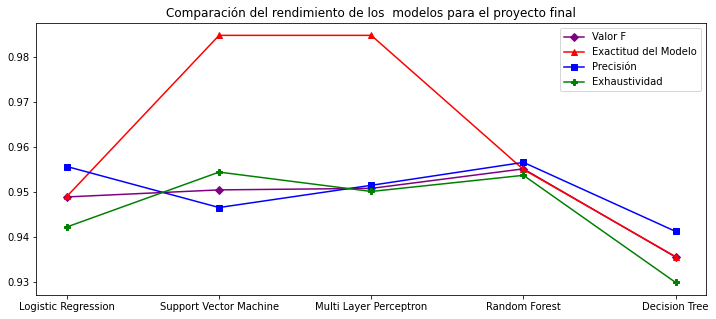

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))
plt.plot(["Logistic Regression", "Support Vector Machine", "Multi Layer Perceptron", "Random Forest", "Decision Tree"],
         [f1_lr, f1_svm, f1_mlp, f1_rdf, f1_dct],
         color='purple',marker='D')
plt.plot(["Logistic Regression", "Support Vector Machine", "Multi Layer Perceptron", "Random Forest", "Decision Tree"],
         [ma_lr, ma_svm, ma_mlp, ma_rdf, ma_dct],
         color='red',marker='^')
plt.plot(["Logistic Regression", "Support Vector Machine", "Multi Layer Perceptron", "Random Forest", "Decision Tree"],
         [precision_lr, precision_svm, precision_mlp, precision_rdf, precision_dct],
         color='blue',marker='s')
plt.plot(["Logistic Regression", "Support Vector Machine", "Multi Layer Perceptron", "Random Forest", "Decision Tree"],
         [recall_lr, recall_svm, recall_mlp, recall_rdf, recall_dct],
         color='green',marker='P')

plt.legend(('Valor F','Exactitud del Modelo','Precisión','Exhaustividad'))
plt.title('Comparación del rendimiento de los  modelos para el proyecto final')

plt.show(fig)